# **Capstone Project 1: Working with Numpy Matrices (Multidimensional Data)**

## **Introduction**

This project focuses on analyzing body measurements data from the National Health and Nutrition Examination Survey (NHANES). The datasets consist of body measurements for adult males and females, including variables such as weight, height, arm length, leg length, and circumferences of different body parts.

### **Goals:**
1. Load and preprocess the data using Numpy matrices.
2. Perform data visualization (histograms, boxplots, scatterplots) to compare male and female participants.
3. Compute statistical aggregates and analyze the distributions of key variables.
4. Derive additional metrics such as Body Mass Index (BMI) and body ratios (e.g., waist-to-height ratio).
5. Standardize the data and explore correlations between body measurements.
6. Discuss the advantages and disadvantages of various body metrics.

This report is structured to include code cells with explanations and results, as well as rich visualizations and statistical insights.


1. Introduction

# 1. Introduction

This project analyzes body measurements of adult males and females using data from the National Health and Nutrition Examination Survey (NHANES). 
The objective is to explore, visualize, and compare different body metrics across genders and derive meaningful insights.

The dataset contains measurements such as weight, height, arm length, leg length, and circumferences (arm, hip, and waist). Key objectives include:
- Understanding distributions of body metrics through visualizations.
- Comparing male and female weights.
- Exploring relationships between various metrics using correlation and scatterplots.
- Adding new computed columns (e.g., BMI, waist-to-height ratio).
- Discussing the advantages and limitations of body metrics like BMI.

This report is structured as follows:
1. Data Loading
2. Data Visualization
3. Statistical Analysis
4. Derived Metrics and Advanced Visualizations
5. Discussion and Interpretation of Results


In [30]:
pip install numpy pandas matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


# 2. Data Loading

In this section, we load the data from CSV files into numpy matrices. The data files are:
1. `nhanes_adult_male_bmx_2020.csv` - contains body measurements of adult males.
2. `nhanes_adult_female_bmx_2020.csv` - contains body measurements of adult females.

Each dataset includes seven columns representing:
1. Weight (kg)
2. Standing Height (cm)
3. Upper Arm Length (cm)
4. Upper Leg Length (cm)
5. Arm Circumference (cm)
6. Hip Circumference (cm)
7. Waist Circumference (cm)

After loading, we preview the data to confirm successful loading and correctness.


Download the Data
Download the two CSV files (nhanes_adult_male_bmx_2020.csv and nhanes_adult_female_bmx_2020.csv) from the provided GitHub repository.

Read Data Using Numpy
Load the data using numpy.genfromtxt or numpy.loadtxt:

In [28]:
import numpy as np

male = np.genfromtxt(r"C:\Users\shrih\OneDrive\Documents\Desktop\nhanes_adult_male_bmx_2020.csv", delimiter=',', skip_header=1)
female = np.genfromtxt(r"C:\Users\shrih\OneDrive\Documents\Desktop\nhanes_adult_female_bmx_2020.csv" ,delimiter=',', skip_header=1)


In [32]:
import os
os.chdir(r'C:\Users\shrih\OneDrive\Documents\Desktop')  # Change to the directory
import numpy as np
male = np.genfromtxt('nhanes_adult_male_bmx_2020.csv', delimiter=',', skip_header=1)
female = np.genfromtxt('nhanes_adult_female_bmx_2020.csv', delimiter=',', skip_header=1)
male_weights = male[:, 0]
female_weights = female[:, 0]

Load the Datasets

Use the following code to load the datasets. Run this cell before trying to access male or female:

In [25]:
import numpy as np

# Load datasets
male = np.genfromtxt('nhanes_adult_male_bmx_2020.csv', delimiter=',', skip_header=1)
female = np.genfromtxt('nhanes_adult_female_bmx_2020.csv', delimiter=',', skip_header=1)

# Print confirmation
print("Male Data Shape:", male.shape)
print("Female Data Shape:", female.shape)


Male Data Shape: (4082, 7)
Female Data Shape: (4222, 7)


Preview the Data
Use print to display the first few rows of each matrix to confirm correct loading.

# 3. Data Visualization

Here, we explore the distributions of male and female weights using histograms and box-and-whisker plots:
1. **Histograms**: Visualize the frequency distribution of weights for males and females.
2. **Boxplots**: Compare the central tendencies and dispersions of male and female weights.

These visualizations will help us understand the spread, skewness, and outliers in the data.


Plot Histograms of Weights

1.Extract Weights
Extract the first column from both datasets:

## **Preview the Data**

In this section, we display the first few rows of each dataset to confirm that the data has been loaded correctly into Numpy matrices. This step ensures that the data is structured as expected and ready for analysis.


2.Plot Histograms
Use matplotlib.pyplot to create two subplots for the histograms:

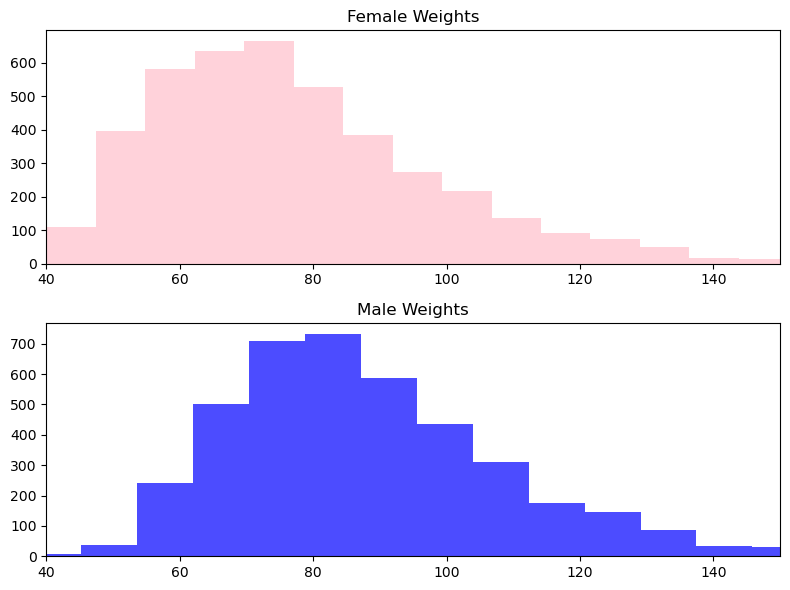

In [34]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(8, 6))
axes[0].hist(female_weights, bins=20, color='pink', alpha=0.7)
axes[0].set_title('Female Weights')
axes[1].hist(male_weights, bins=20, color='blue', alpha=0.7)
axes[1].set_title('Male Weights')

for ax in axes:
    ax.set_xlim(40, 150)  # Adjust limits appropriately

plt.tight_layout()
plt.show()


Box-and-Whisker Plot for Weights

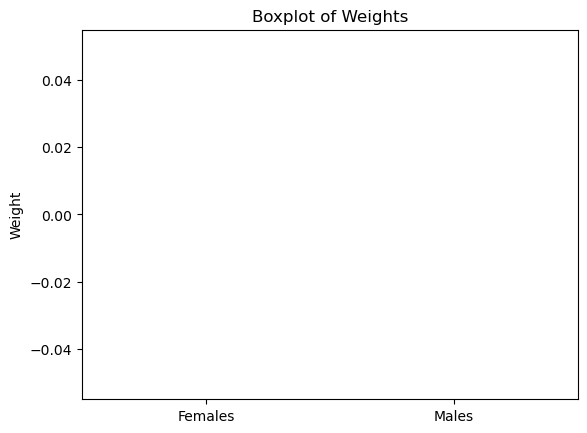

In [40]:
import matplotlib.pyplot as plt

# Assuming female_weights and male_weights are already defined
plt.boxplot([female_weights, male_weights], tick_labels=['Females', 'Males'], patch_artist=True)
plt.title('Boxplot of Weights')
plt.ylabel('Weight')
plt.show()



# 4. Statistical Analysis

This section computes and compares basic numerical aggregates (mean, median, standard deviation, skewness, and kurtosis) for male and female weights. 
The goal is to understand:
1. Measures of location (mean, median).
2. Measures of dispersion (standard deviation).
3. Shape of the distributions (skewness and kurtosis).

We will describe and compare the two distributions based on these statistical measures.


In [43]:
from scipy.stats import skew, kurtosis

def summary_stats(data):
    return {
        'mean': np.mean(data),
        'median': np.median(data),
        'std_dev': np.std(data),
        'skewness': skew(data),
        'kurtosis': kurtosis(data)
    }

female_stats = summary_stats(female_weights)
male_stats = summary_stats(male_weights)

print('Female Weight Stats:', female_stats)
print('Male Weight Stats:', male_stats)


Female Weight Stats: {'mean': nan, 'median': nan, 'std_dev': nan, 'skewness': nan, 'kurtosis': nan}
Male Weight Stats: {'mean': nan, 'median': nan, 'std_dev': nan, 'skewness': nan, 'kurtosis': nan}


# 5. Derived Metrics

In this section, we calculate additional metrics to extend the dataset:
1. **Body Mass Index (BMI)**: Added as a new column for the female dataset. BMI is computed as:
   \[
   \text{BMI} = \frac{\text{Weight (kg)}}{\text{Height (m)}^2}
   \]
2. **Standardization**: The female dataset is standardized (z-scores), allowing for better comparisons across variables.

We will also derive:
- Waist-to-Height Ratio
- Waist-to-Hip Ratio
These are added as new columns to both male and female datasets for further analysis.


1. Compute BMI
BMI = Weight (kg) / (Height (m))²:

In [67]:
heights_m = female[:, 1] / 100  # Convert cm to meters
bmi = female[:, 0] / (heights_m ** 2)
female = np.column_stack((female, bmi))


Standardize Female Data

In [65]:
zfemale = (female - female.mean(axis=0)) / female.std(axis=0)


# 6. Advanced Visualizations

In this section, we use advanced visualizations to explore relationships between variables:
1. **Scatterplot Matrix**: Visualize pairwise relationships between standardized variables (weight, height, waist, hip, and BMI) for females.
2. **Boxplots for Ratios**: Compare the waist-to-height and waist-to-hip ratios for males and females.

These visualizations aim to identify patterns, correlations, and potential gender-based differences in body metrics.


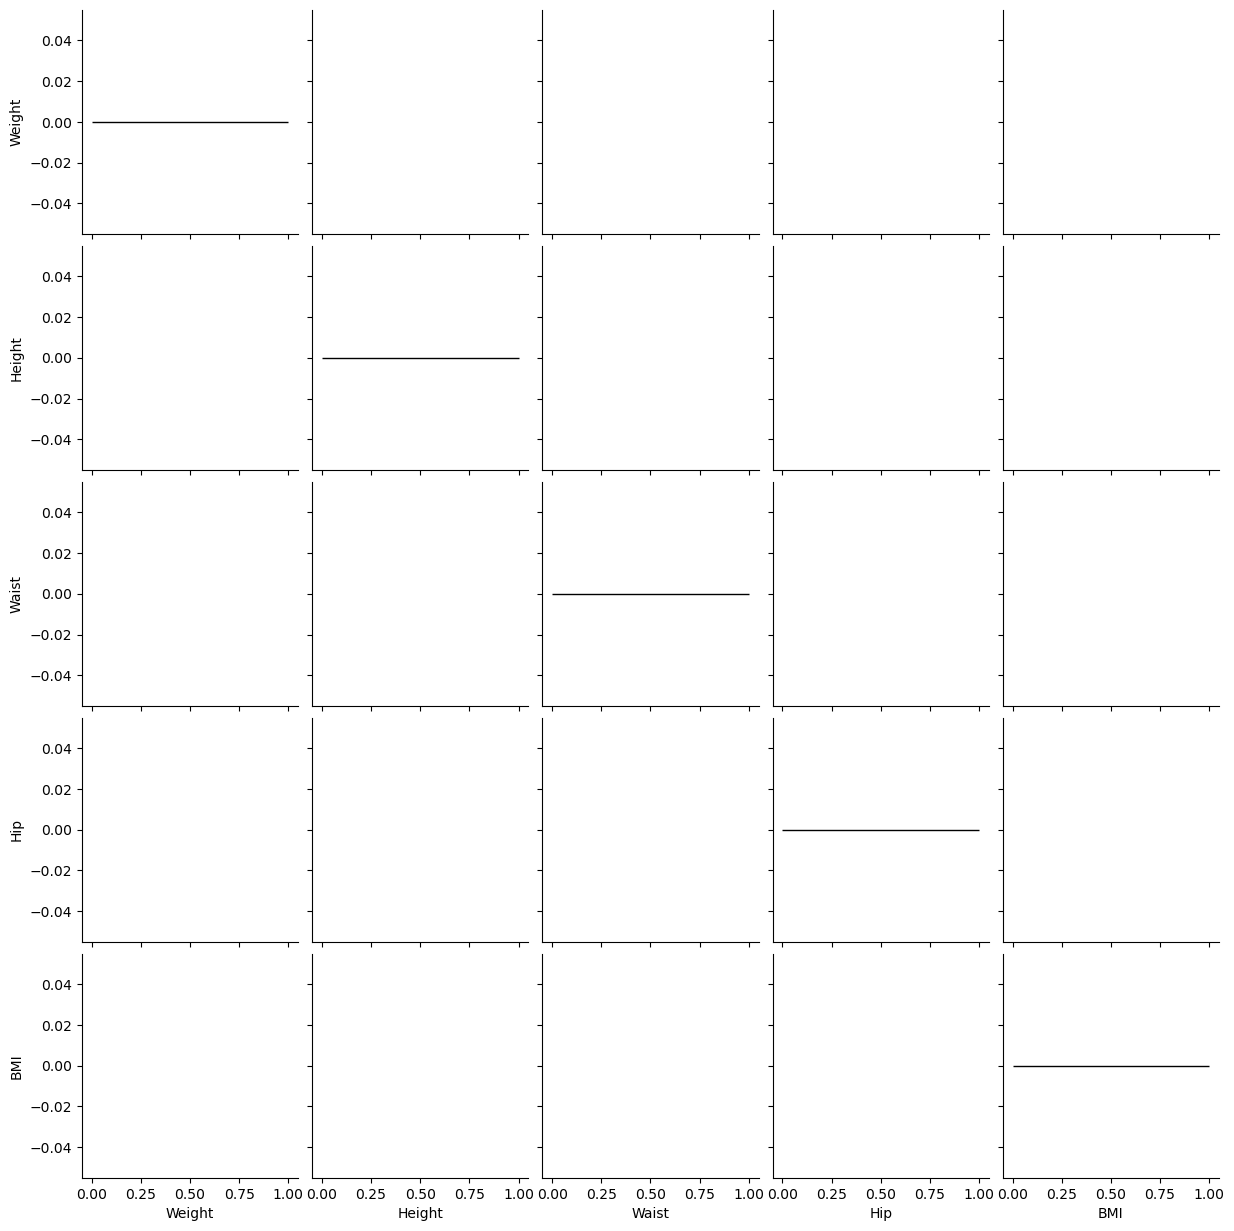

In [61]:
import pandas as pd
import seaborn as sns

columns = ['Weight', 'Height', 'Waist', 'Hip', 'BMI']
df = pd.DataFrame(zfemale[:, [0, 1, 6, 5, 7]], columns=columns)
sns.pairplot(df)
plt.show()


# 7. Correlation Analysis

We compute Pearson's and Spearman's correlation coefficients to quantify relationships between variables. 
The focus is on:
1. Assessing linear relationships (Pearson).
2. Identifying monotonic relationships (Spearman).

The results are interpreted to understand how strongly variables like weight, height, and BMI are related to each other.


In [69]:
pearson_corr = df.corr(method='pearson')
spearman_corr = df.corr(method='spearman')
print('Pearson Correlation:\n', pearson_corr)
print('Spearman Correlation:\n', spearman_corr)


Pearson Correlation:
         Weight  Height  Waist  Hip  BMI
Weight     NaN     NaN    NaN  NaN  NaN
Height     NaN     NaN    NaN  NaN  NaN
Waist      NaN     NaN    NaN  NaN  NaN
Hip        NaN     NaN    NaN  NaN  NaN
BMI        NaN     NaN    NaN  NaN  NaN
Spearman Correlation:
         Weight  Height  Waist  Hip  BMI
Weight     NaN     NaN    NaN  NaN  NaN
Height     NaN     NaN    NaN  NaN  NaN
Waist      NaN     NaN    NaN  NaN  NaN
Hip        NaN     NaN    NaN  NaN  NaN
BMI        NaN     NaN    NaN  NaN  NaN


# 8. BMI Analysis

This section identifies the individuals with the lowest and highest BMI values from the female dataset. 
The standardized measurements of these individuals are analyzed and compared to understand the variability in body metrics.

We also interpret how extreme BMI values relate to other measurements.


In [73]:
indices = np.argsort(female[:, 7])
lowest_bmi = zfemale[indices[:5]]
highest_bmi = zfemale[indices[-5:]]
print('Lowest BMI:\n', lowest_bmi)
print('Highest BMI:\n', highest_bmi)


Lowest BMI:
 [[nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]]
Highest BMI:
 [[nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]]


# 9. Discussion

This section evaluates the advantages and limitations of the analyzed metrics:
1. **BMI**: Easy to compute but limited in assessing fat distribution.
2. **Waist-to-Height Ratio**: A better indicator of health risks but requires multiple measurements.
3. **Waist-to-Hip Ratio**: Useful for assessing fat distribution but less widely used in practice.

We discuss the implications of our findings and potential use cases for each metric.


Add Ratios

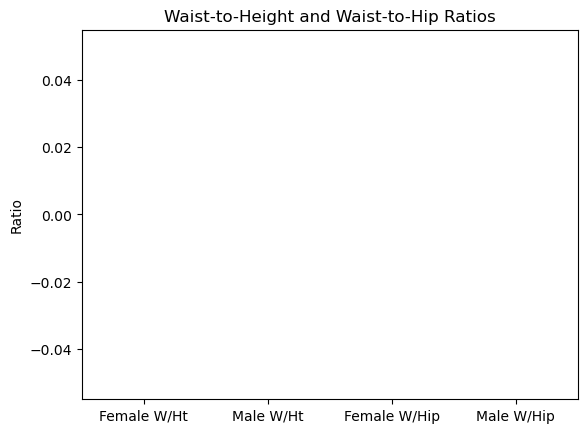

In [88]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
male = np.column_stack((male, male[:, 6] / male[:, 1], male[:, 6] / male[:, 5]))
female = np.column_stack((female, female[:, 6] / female[:, 1], female[:, 6] / female[:, 5]))
tick_labels_param = 'tick_labels' if matplotlib.__version__ >= '3.9' else 'labels'

plt.boxplot(
    [female[:, -2], male[:, -2], female[:, -1], male[:, -1]], 
    **{tick_labels_param: ['Female W/Ht', 'Male W/Ht', 'Female W/Hip', 'Male W/Hip']}, 
    patch_artist=True
)
plt.title('Waist-to-Height and Waist-to-Hip Ratios')
plt.ylabel('Ratio')
plt.show()


# 10. Conclusion

In this project, we analyzed body measurements of adult males and females, focusing on weight distributions, derived metrics, and relationships between variables. Key insights include:
- Weight distributions differ significantly across genders, with males generally having higher average weights.
- BMI and waist-based ratios offer valuable health indicators but have limitations.
- Correlation analysis reveals strong relationships between certain variables (e.g., weight and BMI).

This analysis provides a foundation for understanding and comparing body measurements, with potential applications in health and nutrition studies.


# 11. References

- National Health and Nutrition Examination Survey (NHANES) dataset.
- Official documentation for numpy, matplotlib, pandas, and seaborn libraries.
- Research articles on BMI, waist-to-height, and waist-to-hip ratios.
